In [1]:
import glob
import os
from shutil import copyfile, rmtree
import argparse as ap
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.io import imread, imsave
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
import warnings
warnings.filterwarnings('ignore')
background_dir_path = './dataset/ColorCars/BackgroundOrigins'
background_crops_dir_path = './dataset/ColorCars/BackgroundCrops150150'
window_width, window_height = 150, 150

In [3]:
def plot_sample(x, axis):
    # img = x.reshape(96,96)
    axis.imshow(x)
    axis.axis('off')

def draw_multi_plot(X, row_num=4, col_num=4, fig_size=(15,10)):
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=fig_size)
    i=0
    for row in axes:
        for each_ax in row:
            plot_sample(X[i], each_ax)
            i += 1
    plt.tight_layout()

In [11]:
def random_window(image, window_size, num):
    # print(window_size[0], window_size[1], image.shape)
    y_max = image.shape[0] - window_size[1]
    x_max = image.shape[1] - window_size[0]
    for i in range(0, num):
        x = random.randint(0, x_max)
        y = random.randint(0, y_max)
        yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

In [7]:
len(os.listdir(background_dir_path))

1240

150 150 (240, 320, 3)
<class 'numpy.ndarray'> (150, 150, 3)
16 40
<class 'numpy.ndarray'> (150, 150, 3)
98 88
<class 'numpy.ndarray'> (150, 150, 3)
10 69
<class 'numpy.ndarray'> (150, 150, 3)
12 44
<class 'numpy.ndarray'> (150, 150, 3)
166 13
<class 'numpy.ndarray'> (150, 150, 3)
111 21
<class 'numpy.ndarray'> (150, 150, 3)
159 57
<class 'numpy.ndarray'> (150, 150, 3)
91 78
<class 'numpy.ndarray'> (150, 150, 3)
103 39
<class 'numpy.ndarray'> (150, 150, 3)
80 13
<class 'numpy.ndarray'> (150, 150, 3)
77 36
<class 'numpy.ndarray'> (150, 150, 3)
163 43
<class 'numpy.ndarray'> (150, 150, 3)
60 83
<class 'numpy.ndarray'> (150, 150, 3)
110 17
<class 'numpy.ndarray'> (150, 150, 3)
2 23


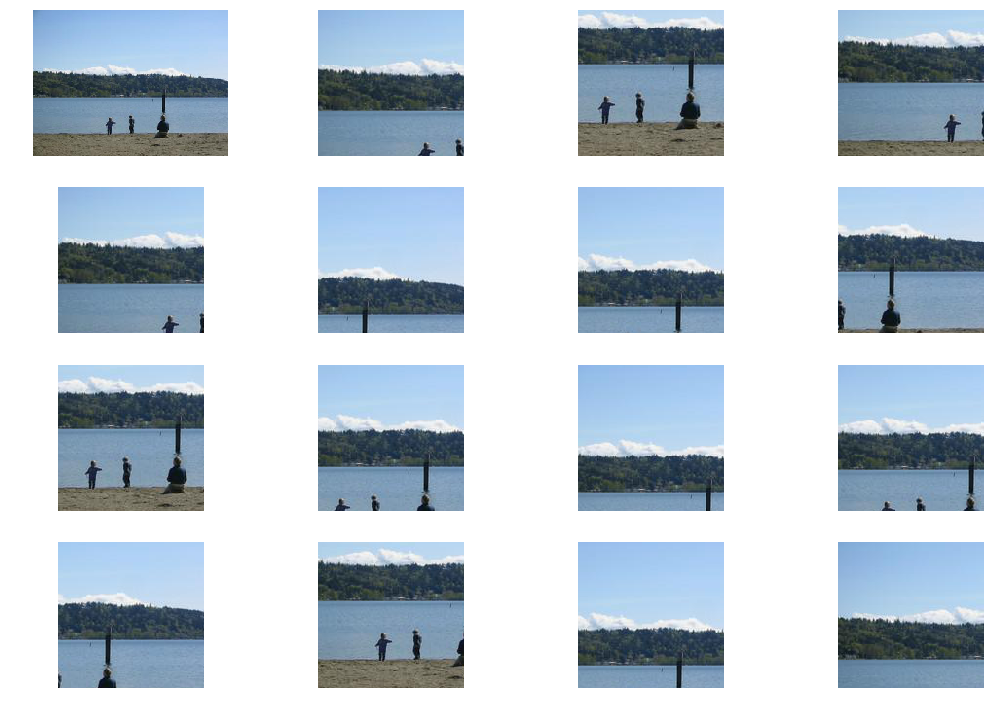

In [6]:
im_path = background_dir_path+'/0000051.jpg'
imgs = []
img = imread(im_path)
imgs.append(img)
window_idx = 0
for x, y, im_window in random_window(img, (window_width, window_height), 15):
    print(type(im_window), im_window.shape)
    print(x,y)
    imgs.append(im_window)
draw_multi_plot(imgs)

In [18]:
if os.path.isdir(background_crops_dir_path):
    rmtree(background_crops_dir_path)
    os.makedirs(background_crops_dir_path)
    print("Clean %s directory.." % background_crops_dir_path)
elif not os.path.isdir(background_crops_dir_path):
    os.makedirs(background_crops_dir_path)
    print("Making %s directory.." % background_crops_dir_path)

img_idx = 0
backgroud_dir_items = glob.glob(os.path.join(background_dir_path, '*'))
random.shuffle(backgroud_dir_items)
for i, im_path in enumerate(backgroud_dir_items):
    # print(im_path)
    # if img_idx > 10:
    #    break
    img = imread(im_path)
    window_idx = 0
    if img.shape[0] <= window_width or img.shape[1] <= window_height:
        continue
    for x, y, im_window in random_window(img, (window_width, window_height), 6):
        #print(type(im_window), im_window.shape)
        #print(x,y)
        window_idx += 1
        imsave(background_crops_dir_path+'/{}_{}.jpg'.format(img_idx,window_idx), im_window)
        #print(background_crops_dir_path+'/{}_{}{}.jpg'.format(img_idx,x,y), " image save done..")
    img_idx += 1
    if i % 100 == 0:
        print("{} Background Image Croped..".format(i))

print("new croped background image : ",len(os.listdir(background_crops_dir_path)))

Clean ./dataset/ColorCars/BackgroundCrops directory..
0 Background Image Croped..
100 Background Image Croped..
200 Background Image Croped..
300 Background Image Croped..
400 Background Image Croped..
500 Background Image Croped..
600 Background Image Croped..
700 Background Image Croped..
800 Background Image Croped..
900 Background Image Croped..
1000 Background Image Croped..
1100 Background Image Croped..
1200 Background Image Croped..
new croped background image :  7434
